# **Nivel Educativo de la Madre como Determinante Clave del Acceso a Controles Prenatales en Perú**
**Curso:** Introducción a Machine Learning con Python

**Grupo 5:**

Calle Cardoza Fabricio

Jimenez Vargas Bianca Nicole

Lalupu Lalupu Aracely Del Pilar

Naira Carmen José Alonso


---


# 1. Introducción y Marco teórico
### Un Enfoque en el Acceso al Control Prenatal en el Perú (2018-2023)

La atención prenatal es una intervención fundamental para reducir la mortalidad maternal y neonatal, nos ayuda a mantener y cuidar la vida de dos personas a la vez y que les pemita llevar tanto un embarazo como un parto saludable.
En el Perú, las políticas de salud pública, lideradas por el Ministerio de Salud (MINSA), promueven activamente el acceso a estos servicios. Un estándar de atención adecuada, tal como lo establece la Norma Técnica de Salud para la Atención Integral de Salud Materna, incluye un mínimo de seis atenciones durante la gestación. En estas atenciones se preveen problemas fisíologícos y emocionales, su objetivo es prevenir y detectar enfermedades como la anemia, el VIH o la hipertensión, y ofrecer un soporte emocional y educativo integral para la gestante y su familia, abordando aspectos de autocuidado y preparación para la lactancia.

Si bien la **Encuesta Demográfica y de Salud Familiar (ENDES)** de 2021 reportó una alta cobertura general, con el 98.3% de las mujeres gestantes habiendo recibido atención profesional calificada , no podemos olvidar que nuestro país se encuentra ligado a desigualdades territoriales y estructurales en muchos aspectos. Las mujeres en zonas rurales de la sierra y la selva, así como aquellas en áreas de pobreza, enfrentan mayores complicaciones para acceder a estos servicios. Este contexto justifica la necesidad de una investigación más profunda que vaya más allá de las cifras de cobertura global y examine los factores subyacentes que influyen en la calidad y frecuencia de la atención recibida por parte de estas futuras madres. Para comprender y explicar esta diferenciación en el Perú, hemos establecido nuestra pregunta de investigación: **¿Cómo se relaciona el nivel educativo de la madre con el acceso a controles prenatales adecuados en el Perú?**

Nuestra hipótesis es que existe una relación positiva y significativa: **a mayor nivel educativo de la madre, mayor será la probabilidad de tener un control prenatal adecuado** (definido como 6 o más visitas).




##Fuente de Datos
Para este análisis, nos basamos en la **Encuesta Demográfica y de Salud Familiar (ENDES)**, una fuente oficial y robusta de datos que nos permite estudiar la salud de las familias peruanas. Nuestro objetivo es explorar la relación entre el control prenatal y variables clave como el **nivel educativo de la madre**, el **quintil de riqueza del hogar**, la **Ubicación geográfica (urbano/rural)** y la **edad de la madre**, teniendo en cuenta un rango de edad entre los 15 a 49 años

##Variables Clave

1. Control Prenatal Adecuado: Variable dependiente.

2. Nivel Educativo de la Madre: La educación aumenta la capacidad de comprender la importancia del cuidado preventivo y facilita el acceso a la información.

3. Quintil de Riqueza: El ingreso familiar condiciona la demanda efectiva de servicios de salud.

4. Ubicación geográfica (urbano/rural): En áreas rurales, las barreras de infraestructura y disponibilidad de servicios limitan el acceso.

5. Edad de la Madre: Variable de control. La edad puede influir en la búsqueda de atención médica, siendo un factor que mejora la robustez del análisis.




La teoría económica y social sugiere que el acceso a servicios de salud está fuertemente correlacionado con el nivel educativo y la riqueza. Se espera que las madres con mayor educación y en hogares de mayores ingresos tengan un acceso más completo al control prenatal. Del mismo modo, las diferencias geográficas podrían revelar disparidades en la infraestructura de salud. Este notebook busca validar y cuantificar estas hipótesis con los datos de ENDES, contando una historia coherente a través de gráficos y su interpretación.


#Preparación y Limpieza de Datos

En este bloque, importaremos las librerías necesarias y cargaremos los datos. Luego, aplicaremos los filtros y transformaciones para preparar el dataset para el análisis. Como se mencionó, nos centraremos en los registros de mujeres de 15 a 49 años con nacimientos en los últimos cinco años.

**Subimos la carpeta en donde se encuentra la data:**

DATA_ENDES_REC91

Y de Google Drive la movemos a Colab

In [45]:
# Esta es la ruta por defecto que usa Google Colab para montar Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**REVISAMOS NOMBRES DE BASES DE DATOS QUE VAMOS A UTILIZAR**

Para esto usamos código y vemos que todas las bases estén de un periodo de 2018 - 2023

In [46]:
import os

# ruta a la carpeta en Drive
path91 = "/content/drive/MyDrive/DATA_ENDES_REC91/"
path94 = "/content/drive/MyDrive/DATA_ENDES_REC94/"
path0111 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"
path41 = "/content/drive/MyDrive/DATA_ENDES_REC41/"

# listar los archivos que haya dentro de mi Drive
print(os.listdir(path91))
print(os.listdir(path94))
print(os.listdir(path0111))
print(os.listdir(path41))

['REC91_2018.SAV', 'REC91_2019.sav', 'REC91_2020.sav', 'REC91_2021.SAV', 'REC91_2022.sav', 'REC91_2023.sav']
['REC94_2018.SAV', 'REC94_2019.SAV', 'REC94_2020.sav', 'REC94_2021.SAV', 'REC94_2022.sav', 'REC94_2023.sav']
['REC0111_2018.SAV', 'REC0111_2019.sav', 'REC0111_2020.sav', 'REC0111_2021.SAV', 'REC0111_2022.sav', 'REC0111_2023.sav']
['REC41_2018.sav', 'REC41_2019.sav', 'REC41_2020.sav', 'REC41_2021.sav', 'REC41_2022.sav', 'REC41_2023.sav']


In [47]:
# si pyreadstat todavía no está instalado, solo ejecuta este código
!pip install pyreadstat

**REVISAMOS CARACTERÍSTICAS DE ALGUNAS DE LAS BASES DE DATOS**

Esto con el fin de ver si se han subido correctamente y que la información esté disponible

In [48]:
import pyreadstat

# ejemplo: leer un archivo REC41
df, meta = pyreadstat.read_sav("/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2020.sav")

# ver las primeras 20 filas (similar a list in 1/20 en Stata)
print(df.head(20))

# ver estructura del dataset (número de obs, variables, tipos de datos)
print(df.info())

# ver un resumen estadístico de todas las variables numéricas
print(df.describe())


       ID1              CASEID  MIDX   M1  M1A  M1B  M1C  M1D  M1E  M2A  ...  \
0   2020.0        000102401  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
1   2020.0        000117001  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
2   2020.0        000119801  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
3   2020.0        000123601  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
4   2020.0        000123901  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
5   2020.0        000206801  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  1.0  ...   
6   2020.0        000208401  2   1.0  0.0  0.0  NaN  NaN  NaN  NaN  0.0  ...   
7   2020.0        000303001  2   1.0  2.0  NaN  NaN  NaN  NaN  NaN  1.0  ...   
8   2020.0        000303001  2   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
9   2020.0        000312401  2   1.0  2.0  NaN  NaN  NaN  NaN  NaN  0.0  ...   
10  2020.0        000322101  2   1.0  2.0  NaN  NaN  NaN  NaN  NaN  0.0  ...   
11  2020.0        000323501  2   1.0  2.

**CONTROLES PRENATALES**

In [49]:
import os
import pyreadstat

# Carpeta REC41
path41 = "/content/drive/MyDrive/DATA_ENDES_REC41/"

for file in os.listdir(path41):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path41, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si M14 está en las variables
        if "M14" in meta.column_names:
            print(f"✅ La variable 'M14' SÍ está en {file}")
        else:
            print(f"❌ La variable 'M14' NO está en {file}")

✅ La variable 'M14' SÍ está en REC41_2018.sav
✅ La variable 'M14' SÍ está en REC41_2019.sav
✅ La variable 'M14' SÍ está en REC41_2020.sav
✅ La variable 'M14' SÍ está en REC41_2021.sav
✅ La variable 'M14' SÍ está en REC41_2022.sav
✅ La variable 'M14' SÍ está en REC41_2023.sav


**NIVEL EDUCATIVO DE LA MADRE**

In [50]:
import os
import pyreadstat

# Carpeta REC91
path91 = "/content/drive/MyDrive/DATA_ENDES_REC91/"

for file in os.listdir(path91):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path91, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si S108N está en las variables
        if "S108N" in meta.column_names:
            print(f"✅ La variable 'S108N' SÍ está en {file}")
        else:
            print(f"❌ La variable 'S108N' NO está en {file}")

✅ La variable 'S108N' SÍ está en REC91_2018.SAV
✅ La variable 'S108N' SÍ está en REC91_2019.sav
✅ La variable 'S108N' SÍ está en REC91_2020.sav
✅ La variable 'S108N' SÍ está en REC91_2021.SAV
✅ La variable 'S108N' SÍ está en REC91_2022.sav
✅ La variable 'S108N' SÍ está en REC91_2023.sav


**REGION EN LA QUE VIVE**

In [51]:
import os
import pyreadstat

# Carpeta REC91
path91 = "/content/drive/MyDrive/DATA_ENDES_REC91/"

for file in os.listdir(path91):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path91, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si SREGION está en las variables
        if "SREGION" in meta.column_names:
            print(f"✅ La variable 'SREGION' SÍ está en {file}")
        else:
            print(f"❌ La variable 'SREGION' NO está en {file}")

✅ La variable 'SREGION' SÍ está en REC91_2018.SAV
✅ La variable 'SREGION' SÍ está en REC91_2019.sav
✅ La variable 'SREGION' SÍ está en REC91_2020.sav
✅ La variable 'SREGION' SÍ está en REC91_2021.SAV
✅ La variable 'SREGION' SÍ está en REC91_2022.sav
✅ La variable 'SREGION' SÍ está en REC91_2023.sav


**EDAD DE LA MADRE**

In [52]:
import os
import pyreadstat

# Carpeta REC0111
path0111 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"

for file in os.listdir(path0111):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path0111, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si V012 está en las variables
        if "V012" in meta.column_names:
            print(f"✅ La variable 'V012' SÍ está en {file}")
        else:
            print(f"❌ La variable 'V012' NO está en {file}")

✅ La variable 'V012' SÍ está en REC0111_2018.SAV
✅ La variable 'V012' SÍ está en REC0111_2019.sav
✅ La variable 'V012' SÍ está en REC0111_2020.sav
✅ La variable 'V012' SÍ está en REC0111_2021.SAV
✅ La variable 'V012' SÍ está en REC0111_2022.sav
✅ La variable 'V012' SÍ está en REC0111_2023.sav


**QUINTIL DE RIQUEZA**

In [53]:
import os
import pyreadstat

# Carpeta REC0111
path0111 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"

for file in os.listdir(path0111):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path0111, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si V190 está en las variables
        if "V190" in meta.column_names:
            print(f"✅ La variable 'V190' SÍ está en {file}")
        else:
            print(f"❌ La variable 'V190' NO está en {file}")

✅ La variable 'V190' SÍ está en REC0111_2018.SAV
✅ La variable 'V190' SÍ está en REC0111_2019.sav
✅ La variable 'V190' SÍ está en REC0111_2020.sav
✅ La variable 'V190' SÍ está en REC0111_2021.SAV
✅ La variable 'V190' SÍ está en REC0111_2022.sav
✅ La variable 'V190' SÍ está en REC0111_2023.sav


**URBANO/RURAL**

In [54]:
import os
import pyreadstat

# Carpeta REC0111
path0111 = "/content/drive/MyDrive/DATA_ENDES_REC0111/"

for file in os.listdir(path0111):
    if file.lower().endswith(".sav"):
        filepath = os.path.join(path0111, file)

        # Cargar solo metadatos (rápido, sin leer toda la data)
        df, meta = pyreadstat.read_sav(filepath)

        # Revisar si V102 está en las variables
        if "V102" in meta.column_names:
            print(f"✅ La variable 'V102' SÍ está en {file}")
        else:
            print(f"❌ La variable 'V102' NO está en {file}")

✅ La variable 'V102' SÍ está en REC0111_2018.SAV
✅ La variable 'V102' SÍ está en REC0111_2019.sav
✅ La variable 'V102' SÍ está en REC0111_2020.sav
✅ La variable 'V102' SÍ está en REC0111_2021.SAV
✅ La variable 'V102' SÍ está en REC0111_2022.sav
✅ La variable 'V102' SÍ está en REC0111_2023.sav


# 4. Análisis Exploratorio y Visualizaciones

Con los datos limpios y consolidados, procederemos a crear visualizaciones que nos permitan responder a nuestra pregunta de investigación y explorar la relación con otras variables.


### 4.1. Análisis Central: Nivel Educativo y Controles Prenatales

El siguiente segmento de gráficos de barras muestra la proporción de mujeres con controles prenatales adecuados (6 o más visitas) según su nivel educativo para cada año estudiado.


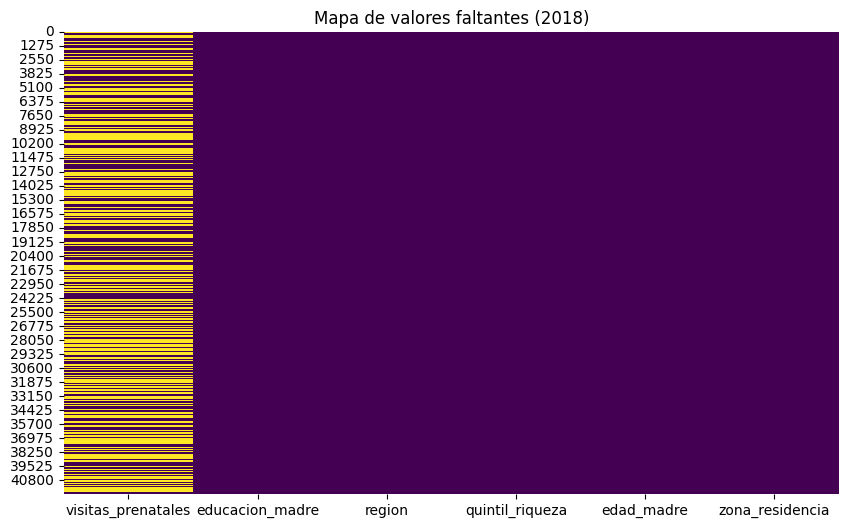

In [55]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2018
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# Leer solo las columnas que interesan
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2018["year"] = 2018

# Variable dependiente: prenatal adecuado
df_2018["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2018["educacion"] = df_2018["S108N"].map(map_edu)

# Dummy urbano/rural
df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x == 1 else 0)

# Proporción de controles adecuados por educación
tabla = df_2018.groupby("educacion")["prenatal_adecuado"].mean()

import seaborn as sns
import matplotlib.pyplot as plt

# Renombrar variables a nombres más descriptivos
df_2018 = df_2018.rename(columns={
    "M14": "visitas_prenatales",
    "S108N": "educacion_madre",
    "SREGION": "region",
    "V190": "quintil_riqueza",
    "V012": "edad_madre",
    "V102": "zona_residencia"
})

# Seleccionamos solo las variables relevantes (ya con nombres renombrados)
vars_needed = ["visitas_prenatales", "educacion_madre", "region", "quintil_riqueza", "edad_madre", "zona_residencia"]
df_check = df_2018[vars_needed]

# Graficar heatmap de missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_check.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes (2018)")
plt.show()

El mapa de valores faltantes es una herramienta visual que nos permite identificar de manera rápida qué variables de nuestro conjunto de datos presentan información incompleta y en qué magnitud. Al aplicarlo a la ENDES 2018, podemos observar si variables como las visitas prenatales, el quintil de riqueza o el nivel educativo de la madre tienen registros ausentes en ciertos grupos de mujeres, lo cual resulta clave antes de avanzar en cualquier análisis. De esta forma, el gráfico nos ayuda a evaluar la calidad de la información con la que trabajamos y nos orienta en la toma de decisiones sobre cómo manejar esos vacíos, ya sea mediante imputación, exclusión de casos o ajustes en las variables seleccionadas para nuestro estudio.

               educacion  prenatal_adecuado
0               Posgrado           0.978355
1               Primaria           0.843653
2             Secundaria           0.881740
3        Sin instrucción           0.837500
4  Sup. no universitaria           0.929530
5     Sup. universitaria           0.927434


/tmp/ipython-input-3611090438.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


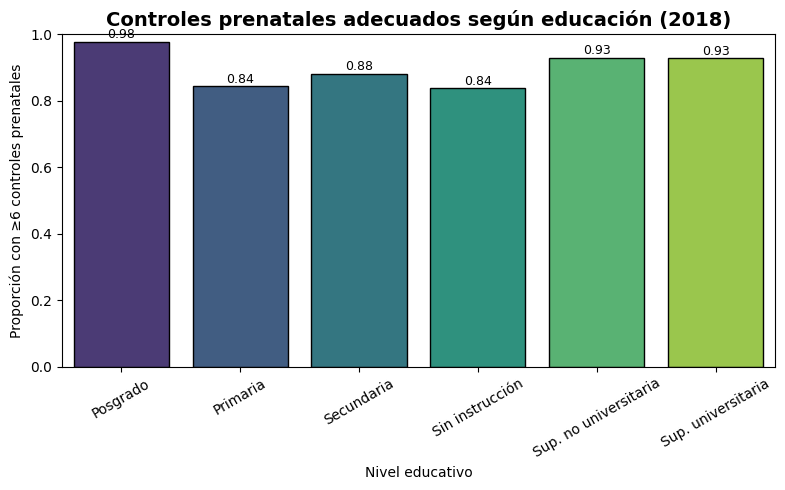

In [56]:
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Paths de 2018

rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"


# Lectura de datos

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2018["year"] = 2018

# Filtrar mujeres con dato en M14
df_2018 = df_2018[df_2018["M14"].notna()]


df_2018 = df_2018[~df_2018["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

# Variable dependiente: prenatal adecuado
df_2018["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2018["educacion"] = df_2018["S108N"].map(map_edu)

# Dummy urbano/rural
df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x == 1 else 0)


# Proporción por educación

tabla = (
    df_2018.groupby("educacion")["prenatal_adecuado"]
    .mean()
    .reset_index()
)

print(tabla)

# Gráfico en Seaborn

plt.figure(figsize=(8,5))
sns.barplot(
    data=tabla,
    x="educacion", y="prenatal_adecuado",
   palette="viridis", edgecolor="black"
)

# Etiquetas encima de cada barra
for i, row in tabla.iterrows():
    plt.text(i, row["prenatal_adecuado"] + 0.01,
             f"{row['prenatal_adecuado']:.2f}",
             ha="center", fontsize=9)

plt.ylabel("Proporción con ≥6 controles prenatales")
plt.xlabel("Nivel educativo")
plt.title("Controles prenatales adecuados según educación (2018)", fontsize=14, fontweight="bold")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



**Interpretación:** El gráfico muestra una clara relación entre el nivel educativo alcanzado en proporción con la asistencia de sus controles prenatales, eso nos da a entender que medida que aumenta el nivel de educación, también lo hace la barra de proporción, lo que indica un mayor acceso a la atención prenatal para el año 2018, y esta tendencia se mantiene para los siguientes años.

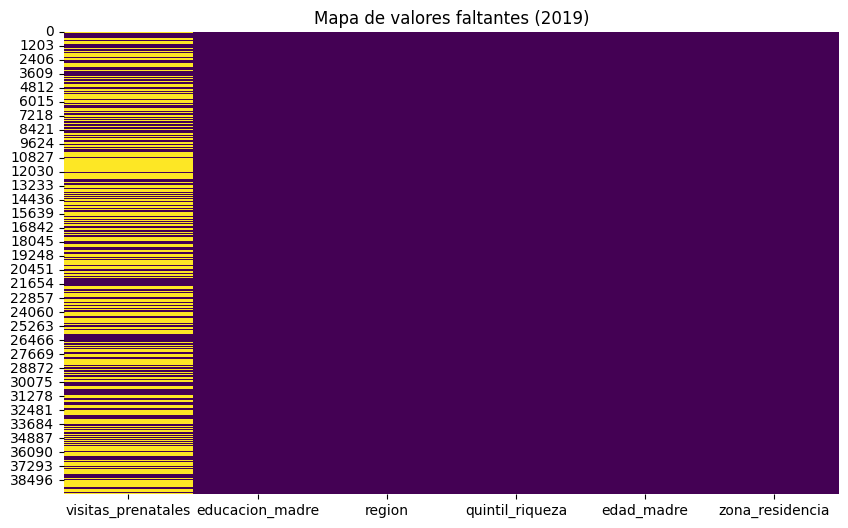

In [57]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt

# Paths de 2019
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2019.sav"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2019.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2019.sav"

# Leer solo las columnas que interesan
rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2019 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2019["year"] = 2019

# Filtrar mujeres con dato en M14


# Variable dependiente: prenatal adecuado
df_2019["prenatal_adecuado"] = (df_2019["M14"] >= 6).astype(int)

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2019["educacion"] = df_2019["S108N"].map(map_edu)

# Dummy urbano/rural
df_2019["urbano"] = df_2019["V102"].apply(lambda x: 1 if x == 1 else 0)

# Proporción de controles adecuados por educación
tabla = df_2019.groupby("educacion")["prenatal_adecuado"].mean()

import seaborn as sns
import matplotlib.pyplot as plt

# Renombrar variables a nombres más descriptivos
df_2019 = df_2019.rename(columns={
    "M14": "visitas_prenatales",
    "S108N": "educacion_madre",
    "SREGION": "region",
    "V190": "quintil_riqueza",
    "V012": "edad_madre",
    "V102": "zona_residencia"
})

# Seleccionamos solo las variables relevantes (ya con nombres renombrados)
vars_needed = ["visitas_prenatales", "educacion_madre", "region", "quintil_riqueza", "edad_madre", "zona_residencia"]
df_check = df_2019[vars_needed]

# Graficar heatmap de missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_check.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes (2019)")
plt.show()


Al igual que en 2018, se observa que la variable de visitas prenatales presenta valores faltantes, aunque en menor medida en 2019.

               educacion  prenatal_adecuado
0               Posgrado           0.971831
1               Primaria           0.863887
2             Secundaria           0.890603
3        Sin instrucción           0.793893
4  Sup. no universitaria           0.936467
5     Sup. universitaria           0.931863


/tmp/ipython-input-2873497616.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


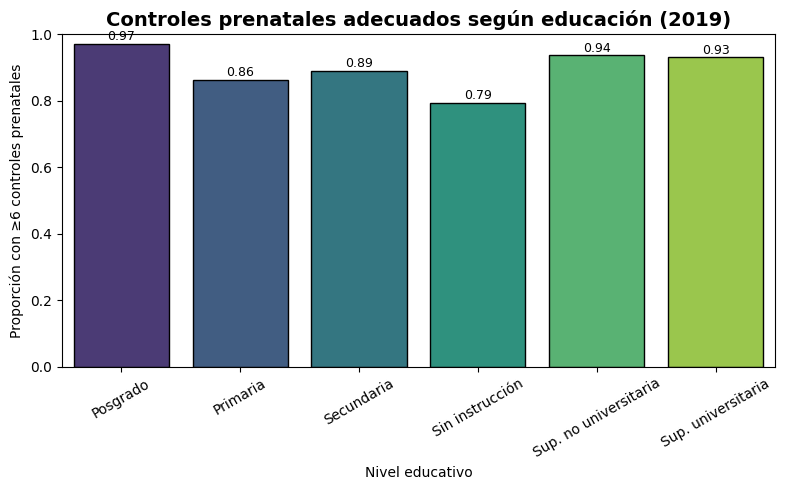

In [58]:
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Paths de 2019

rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2019.sav"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2019.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2019.sav"


# Lectura de datos

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2019 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2019["year"] = 2019

# Filtrar mujeres con dato en M14
df_2019 = df_2019[df_2019["M14"].notna()]

# Variable dependiente: prenatal adecuado
df_2019["prenatal_adecuado"] = (df_2019["M14"] >= 6).astype(int)

# Eliminar valores inválidos de educación
df_2019 = df_2019[~df_2019["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2019["educacion"] = df_2019["S108N"].map(map_edu)


# Dummy urbano/rural
df_2019["urbano"] = df_2019["V102"].apply(lambda x: 1 if x == 1 else 0)


# Proporción por educación

tabla = (
    df_2019.groupby("educacion")["prenatal_adecuado"]
    .mean()
    .reset_index()
)

print(tabla)


# Gráfico con Seaborn

plt.figure(figsize=(8,5))
sns.barplot(
    data=tabla,
    x="educacion", y="prenatal_adecuado",
    palette="viridis", edgecolor="black"
)

# Etiquetas encima de cada barra
for i, row in tabla.iterrows():
    plt.text(i, row["prenatal_adecuado"] + 0.01,
             f"{row['prenatal_adecuado']:.2f}",
             ha="center", fontsize=9)

plt.ylabel("Proporción con ≥6 controles prenatales")
plt.xlabel("Nivel educativo")
plt.title("Controles prenatales adecuados según educación (2019)", fontsize=14, fontweight="bold")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Interpretación:** El gráfico de 2019 muestra que la proporción de mujeres que accedieron a seis o más controles prenatales durante el embarazo aumenta conforme se eleva el nivel educativo alcanzado. Las mujeres con educación de posgrado presentan la cobertura más alta, cercana a la totalidad, mientras que aquellas sin instrucción registran la proporción más baja. Entre los niveles intermedios, las mujeres con educación primaria presentan porcentajes menores que quienes alcanzaron secundaria, y tanto la educación superior universitaria como no universitaria muestran valores elevados y bastante similares entre sí. En conjunto, la evidencia confirma una clara asociación positiva entre el nivel educativo de la madre y la probabilidad de recibir un control prenatal adecuado.


### 4.2. Quintil de Riqueza y Región

Finalmente, exploramos cómo el quintil de riqueza y la región natural influyen en el acceso a los controles prenatales.


               educacion  prenatal_adecuado
0               Posgrado           0.961538
1               Primaria           0.874098
2             Secundaria           0.884551
3        Sin instrucción           0.832579
4  Sup. no universitaria           0.906146
5     Sup. universitaria           0.928043


/tmp/ipython-input-1214863957.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


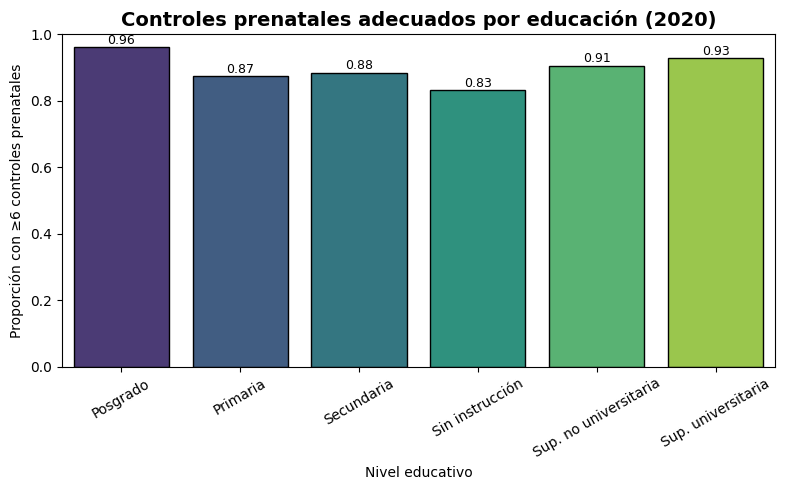

In [59]:
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Paths de 2020

rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2020.sav"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2020.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2020.sav"


# Lectura de datos

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

# Merge por CASEID
df_2020 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Año
df_2020["year"] = 2020

# Filtrar mujeres con dato en M14
df_2020 = df_2020[df_2020["M14"].notna()]

# Variable dependiente: prenatal adecuado
df_2020["prenatal_adecuado"] = (df_2020["M14"] >= 6).astype(int)

# Eliminar valores inválidos de educación
df_2020 = df_2020[~df_2020["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91, 90])]
df_2020 = df_2020[~df_2020["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
# Recodificar educación
map_edu = {
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
}
df_2020["educacion"] = df_2020["S108N"].map(map_edu)

# Dummy urbano/rural
df_2020["urbano"] = df_2020["V102"].apply(lambda x: 1 if x == 1 else 0)


# Proporción de controles adecuados por educación

tabla_edu = (
    df_2020.groupby("educacion")["prenatal_adecuado"]
    .mean()
    .reset_index()
)

print(tabla_edu)


# Gráfico con Seaborn

plt.figure(figsize=(8,5))
sns.barplot(
    data=tabla_edu,
    x="educacion", y="prenatal_adecuado",
    palette="viridis", edgecolor="black"
)

# Etiquetas encima de cada barra
for i, row in tabla_edu.iterrows():
    plt.text(i, row["prenatal_adecuado"] + 0.01,
             f"{row['prenatal_adecuado']:.2f}",
             ha="center", fontsize=9)

plt.ylabel("Proporción con ≥6 controles prenatales")
plt.xlabel("Nivel educativo")
plt.title("Controles prenatales adecuados por educación (2020)", fontsize=14, fontweight="bold")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Interpretación:** El gráfico de 2020 muestra que la proporción de mujeres que recibieron seis o más controles prenatales tiende a aumentar conforme mejora el nivel educativo alcanzado. Las mujeres con posgrado presentan la mayor cobertura, seguidas de cerca por quienes tienen educación superior universitaria y no universitaria. En contraste, las mujeres sin instrucción registran la proporción más baja, mientras que los niveles de primaria y secundaria se ubican en valores intermedios. En conjunto, los resultados evidencian que la educación sigue siendo un factor determinante en el acceso a controles prenatales adecuados, reflejando una asociación positiva entre mayor escolaridad y mejores prácticas de atención en salud materna.



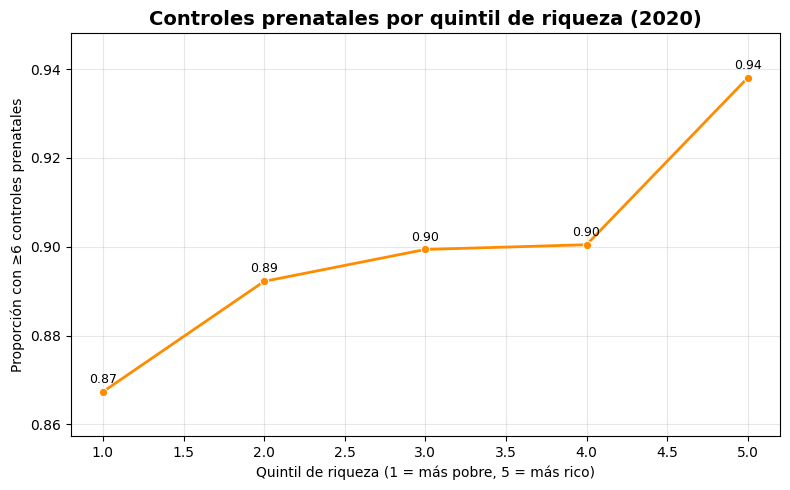

In [60]:
# 2. Línea: proporción por quintil de riqueza
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamos por quintil de riqueza
tabla_quintil = (
    df_2020.groupby("V190")["prenatal_adecuado"]
    .mean()
    .reset_index()
)

# Gráfico con seaborn
plt.figure(figsize=(8,5))
sns.lineplot(
    data=tabla_quintil,
    x="V190", y="prenatal_adecuado",
    marker="o", linewidth=2, color="darkorange"
)

# Etiquetas encima de cada punto
for x, y in zip(tabla_quintil["V190"], tabla_quintil["prenatal_adecuado"]):
    plt.text(x, y+0.002, f"{y:.2f}", ha="center", fontsize=9)

plt.xlabel("Quintil de riqueza (1 = más pobre, 5 = más rico)")
plt.ylabel("Proporción con ≥6 controles prenatales")
plt.title("Controles prenatales por quintil de riqueza (2020)", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)

# Ajuste automático del rango en Y (sin forzar 0–1)
plt.ylim(tabla_quintil["prenatal_adecuado"].min() - 0.01,
         tabla_quintil["prenatal_adecuado"].max() + 0.01)

plt.tight_layout()
plt.show()


**Interpretación:** El gráfico lineal nos indica que la relación que existe entre la riqueza y la proporción de controles prenatales. En este queda evidencia de que familias con altos recursos tienen un mejor control prenatal. Esto se puede originar debido a que cuentan con los recursos económicos necesarios para poder asistir a sus controles, o contratar doctores particulares que puedan asistirlas durante el proceso de embarazo.
Mientras que las familias de bajos recursos se pueden ver perjudicadas por su precario acceso a la salud.

/tmp/ipython-input-4094372769.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


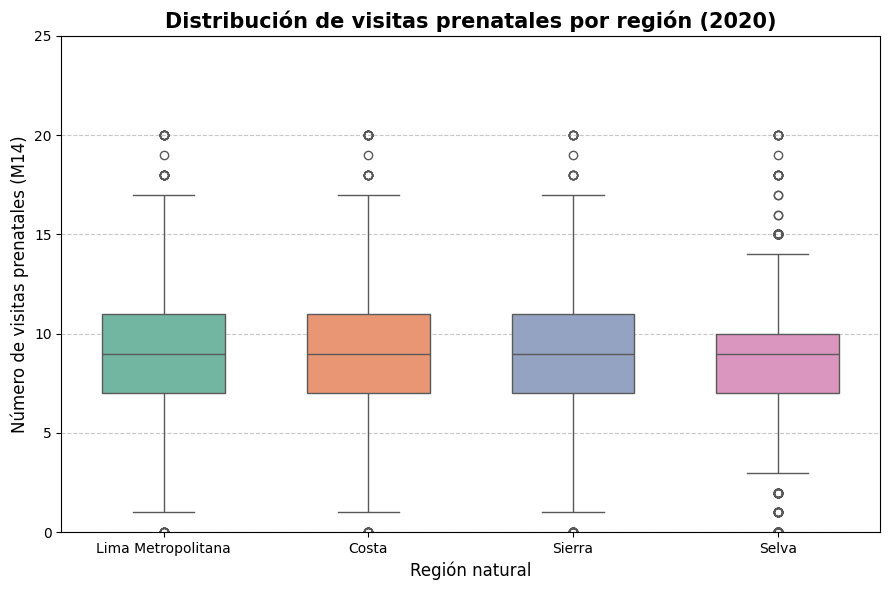

In [61]:
# 3. Boxplot: distribución del número de visitas prenatales por región con seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo de regiones
map_region = {
    1: "Lima Metropolitana",
    2: "Costa",
    3: "Sierra",
    4: "Selva"
}
df_2020["region"] = df_2020["SREGION"].map(map_region)

# Orden correcto
orden_regiones = ["Lima Metropolitana", "Costa", "Sierra", "Selva"]

# Gráfico boxplot
plt.figure(figsize=(9,6))
sns.boxplot(
    x="region",
    y="M14",
    data=df_2020,
    palette="Set2",
    width=0.6,
    order=orden_regiones,
    showfliers=True
)

# Estética
plt.title("Distribución de visitas prenatales por región (2020)", fontsize=15, fontweight="bold")
plt.xlabel("Región natural", fontsize=12)
plt.ylabel("Número de visitas prenatales (M14)", fontsize=12)
plt.ylim(0, 25)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



**Interpretación:** La distribución del número de visitas prenatales en 2020 es similar entre las regiones, con una mediana cercana a 9 - 10 controles, lo que refleja un cumplimiento general de la atención recomendada. La mayoría de las madres recibió entre 6 y 12 visitas, aunque se observan algunos casos con 0 controles y valores atípicos muy altos, posiblemente errores de registro.

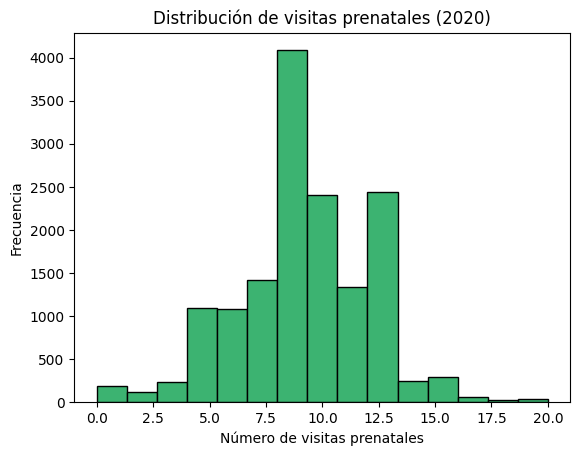

In [62]:

# 4. Histograma: distribución general de visitas prenatales
# 4. Histograma: distribución general de visitas prenatales
df_2020["M14"].plot(kind="hist", bins=15, color="mediumseagreen", edgecolor="black")
plt.xlabel("Número de visitas prenatales")
plt.ylabel("Frecuencia")
plt.title("Distribución de visitas prenatales (2020)")
plt.show()



**Interpretación:** Se evidencia que la mayoría de las madres cumplió con el rango recomendado de 6 a 12 visitas prenatales, lo que refleja un acceso adecuado a la atención en salud. Sin embargo, la presencia de casos sin controles sugiere barreras de acceso a los servicios de salud o falta de información, mientras que los valores extremos muy elevados probablemente correspondan situaciones atípicas asociadas a embarazos de alto riesgo.

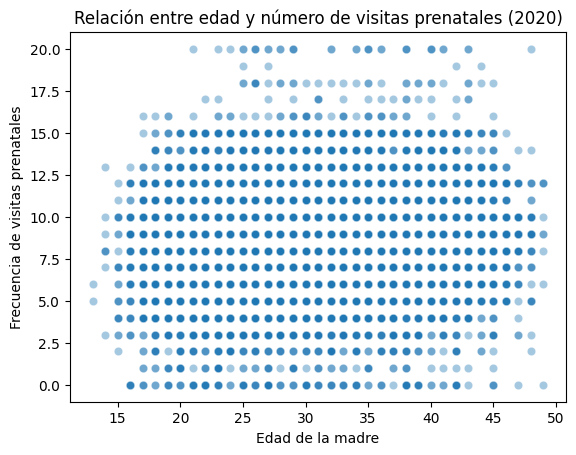

In [63]:
# 5. Scatter plot: distribución del número de visitas prenatales por edad
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df_2020,
    x="V012",
    y="M14",
    alpha=0.4
)
plt.xlabel("Edad de la madre")
plt.ylabel("Frecuencia de visitas prenatales")
plt.title("Relación entre edad y número de visitas prenatales (2020)")
plt.show()



**Interpretación:** Se observa que no existe una relación clara entre la edad de la madre y el número de visitas prenatales; sin embargo, se puede señalar que las adolescentes tienden a tener menos controles, posiblemente por barreras de acceso o falta de información, mientras que las mujeres adultas cumplen en mayor medida con las recomendaciones y, en el caso de las de mayor edad, pueden recibir más visitas por considerarse embarazos de mayor riesgo.

In [64]:
# ===== 2018 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# ================== REC91 ==================
# Leemos el módulo REC91 (cuestionario individual de la mujer).
# Solo cargamos 3 variables específicas:
#  - CASEID  : identificador único de la entrevistada (clave para unir bases).
#  - S108N   : nivel educativo alcanzado.
#  - SREGION : región natural (costa, sierra, selva).
rec91, _ = pyreadstat.read_sav(
    rec91_path,
    usecols=["CASEID", "S108N", "SREGION"]
)

# ================== REC41 ==================
# Leemos el módulo REC41 (salud materna, controles prenatales).
# Solo cargamos:
#  - CASEID : identificador único (para merge).
#  - M14    : número de visitas prenatales de la madre.
rec41, _ = pyreadstat.read_sav(
    rec41_path,
    usecols=["CASEID", "M14"]
)

# ================== REC0111 ==================
# Leemos el módulo REC0111 (información del hogar).
# Cargamos variables sociodemográficas relevantes:
#  - CASEID : identificador único.
#  - V012   : edad de la entrevistada (en años).
#  - V190   : quintil de riqueza (1 = más pobre, 5 = más rico).
#  - V102   : tipo de residencia (1 = urbano, 2 = rural).
# Cargar solo las columnas necesarias de REC0111
rec0111, _ = pyreadstat.read_sav(
    rec0111_path,
    usecols=["CASEID", "V012", "V190", "V102"]
)

# Unir REC91, REC41 y REC0111 por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Añadir columna con el año
df_2018["year"] = 2018

# Filtrar casos con dato en M14 (visitas prenatales)
df_2018 = df_2018[df_2018["M14"].notna()]

df_2018 = df_2018[~df_2018["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2018 = df_2018[~df_2018["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

# Crear variable: 1 si tuvo ≥6 controles, 0 si menos
df_2018["prenatal_adecuado"] = (df_2018["M14"] >= 6).astype(int)

# Traducir códigos de nivel educativo
df_2018["educacion"] = df_2018["S108N"].map({
    0: "Sin instrucción",
    1: "Primaria",
    2: "Secundaria",
    3: "Sup. no universitaria",
    4: "Sup. universitaria",
    5: "Posgrado"
})

# Dummy urbano/rural: 1 urbano, 0 rural
df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2019 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2019.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2019.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2019.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2019 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2019["year"] = 2019
df_2019 = df_2019[df_2019["M14"].notna()]
# Eliminar valores inválidos de educación
df_2019 = df_2019[~df_2019["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2019 = df_2019[~df_2019["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

df_2019["prenatal_adecuado"] = (df_2019["M14"] >= 6).astype(int)
df_2019["educacion"] = df_2019["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2019["urbano"] = df_2019["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2020 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2020.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2020.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2020.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2020 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2020["year"] = 2020
df_2020 = df_2020[df_2020["M14"].notna()]

# Eliminar valores inválidos de educación
df_2020 = df_2020[~df_2020["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91, 90])]
df_2020 = df_2020[~df_2020["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2020 = df_2020[~df_2020["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

df_2020["prenatal_adecuado"] = (df_2020["M14"] >= 6).astype(int)
df_2020["educacion"] = df_2020["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2020["urbano"] = df_2020["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2021 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2021.SAV"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2021.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2021.SAV"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2021 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2021["year"] = 2021
df_2021 = df_2021[df_2021["M14"].notna()]

# Eliminar valores inválidos de educación
df_2021 = df_2021[~df_2021["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91, 90])]
df_2021 = df_2021[~df_2021["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2021 = df_2021[~df_2021["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2021 = df_2021[~df_2021["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2021 = df_2021[~df_2021["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2021 = df_2021[~df_2021["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

df_2021["prenatal_adecuado"] = (df_2021["M14"] >= 6).astype(int)
df_2021["educacion"] = df_2021["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2021["urbano"] = df_2021["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2022 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2022.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2022.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2022.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2022 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2022["year"] = 2022
df_2022 = df_2022[df_2022["M14"].notna()]

df_2022 = df_2022[~df_2022["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91, 90])]
df_2022 = df_2022[~df_2022["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2022 = df_2022[~df_2022["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2022 = df_2022[~df_2022["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2022 = df_2022[~df_2022["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2022 = df_2022[~df_2022["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

df_2022["prenatal_adecuado"] = (df_2022["M14"] >= 6).astype(int)
df_2022["educacion"] = df_2022["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2022["urbano"] = df_2022["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== 2023 =====
rec91_path   = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2023.sav"
rec41_path   = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2023.sav"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2023.sav"

rec91, _ = pyreadstat.read_sav(rec91_path, usecols=["CASEID", "S108N", "SREGION"])
rec41, _ = pyreadstat.read_sav(rec41_path, usecols=["CASEID", "M14"])
rec0111, _ = pyreadstat.read_sav(rec0111_path, usecols=["CASEID", "V012", "V190", "V102"])

df_2023 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")
df_2023["year"] = 2023
df_2023 = df_2023[df_2023["M14"].notna()]

df_2023 = df_2023[~df_2023["S108N"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91, 90])]
df_2023 = df_2023[~df_2023["SREGION"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2023 = df_2023[~df_2023["M14"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2023 = df_2023[~df_2023["V012"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2023 = df_2023[~df_2023["V190"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]
df_2023 = df_2023[~df_2023["V102"].isin([97, 98, 99, 100, 96, 95, 94, 93, 92, 91,90])]

df_2023["prenatal_adecuado"] = (df_2023["M14"] >= 6).astype(int)
df_2023["educacion"] = df_2023["S108N"].map({0:"Sin instrucción",1:"Primaria",2:"Secundaria",3:"Sup. no universitaria",4:"Sup. universitaria",5:"Posgrado"})
df_2023["urbano"] = df_2023["V102"].apply(lambda x: 1 if x==1 else 0)

# ===== Unir todo =====
final_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

print("Observaciones totales:", final_df.shape[0])
print(final_df.groupby("year")["prenatal_adecuado"].mean())


Observaciones totales: 109578
year
2018    0.889868
2019    0.899902
2020    0.892281
2021    0.856695
2022    0.865158
2023    0.879652
Name: prenatal_adecuado, dtype: float64


Al final, obtenemos estadísticas básicas, como el número total de observaciones y el promedio de controles prenatales adecuados por año, lo que nos permitirá realizar un análisis comparativo de la atención prenatal en el tiempo.

### 4.3. Evolución a lo largo del tiempo

Esta sección explora cómo el promedio y la distribución de las visitas prenatales han evolucionado anualmente desde 2018.

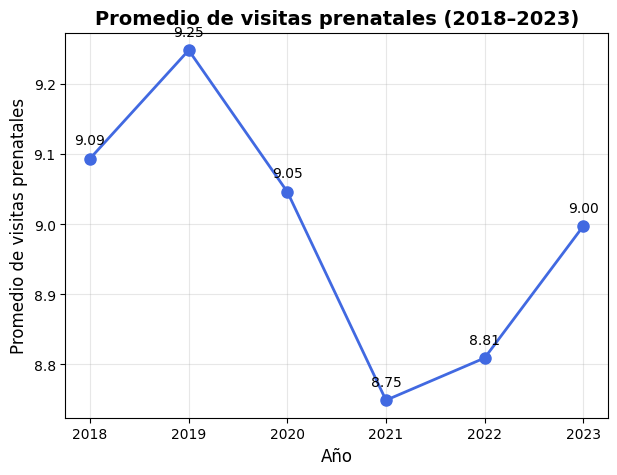

In [65]:
import matplotlib.pyplot as plt

# Promedio de visitas prenatales por año
tabla_promedio = final_df.groupby("year")["M14"].mean()

plt.figure(figsize=(7,5))
plt.plot(tabla_promedio.index, tabla_promedio.values, marker="o",
         linestyle="-", color="royalblue", linewidth=2, markersize=8)

# Títulos y etiquetas
plt.title("Promedio de visitas prenatales (2018–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio de visitas prenatales", fontsize=12)

# Etiquetas en los puntos
for x, y in zip(tabla_promedio.index, tabla_promedio.values):
    plt.text(x, y+0.02, f"{y:.2f}", ha="center", fontsize=10, color="black")

# Ajustes del eje X
plt.xticks([2018, 2019, 2020, 2021, 2022, 2023])

plt.grid(alpha=0.3)
plt.show()


**Interpretación:** Hubo un descenso en el promedio de
 visitas prenatales de 9.53 en 2019 a 8.94 en 2021, lo que sugiere
 un impacto negativo de la pandemia. Posteriormente, el
 promedio se recuperó a 9.14 en 2023. Demostrando en el grafico como la pandemía fue un momento critico para las embarazadas, las cuales faltaban a sus controles por miedo al contagio y por los estados de emergecia que nos mantenía en nuestros hogares.

/tmp/ipython-input-1396849323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


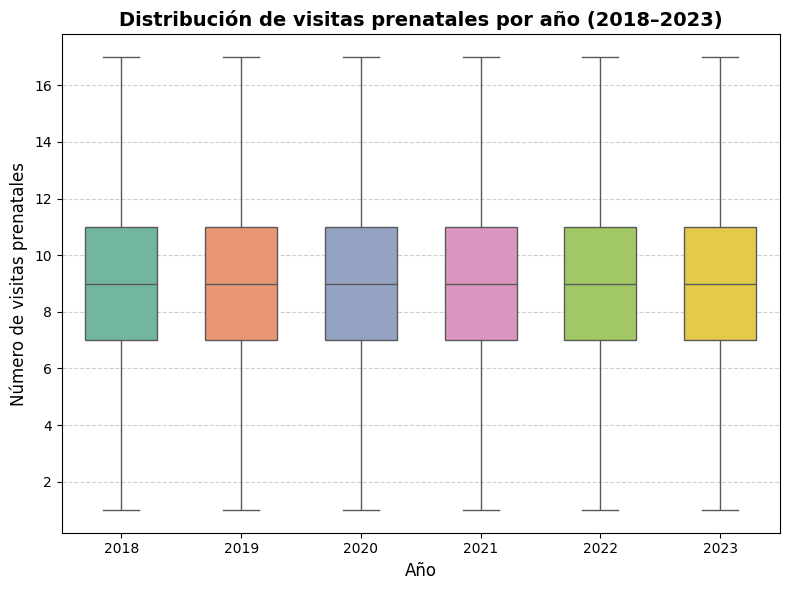

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(
    data=final_df,
    x="year",
    y="M14",
    palette="Set2",     # paleta de colores
    showfliers=False,   # oculta los outliers
    width=0.6
)

plt.title("Distribución de visitas prenatales por año (2018–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de visitas prenatales", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



**Interpretación:** Mediana estable (la mayoría de las mujeres embarazadas
 realizan un número de visitas que se encuentra entre 7 y 10,
 con una mediana constante de 9 visitas a lo largo de los años
 2018-2023).

4.4. Análisis por Residencia (Urbano vs. Rural)

A continuación, visualizamos si el tipo de residencia (urbana o rural) se relaciona con el acceso a controles prenatales adecuados a lo largo de los años.

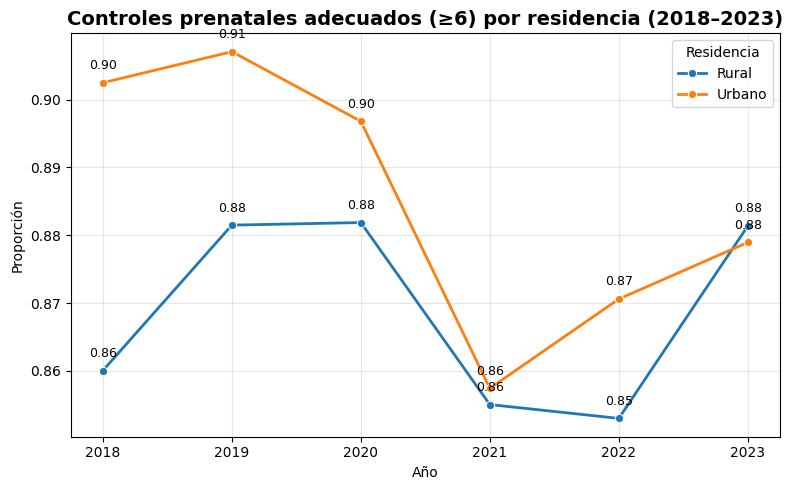

In [67]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crear variable dependiente: control prenatal adecuado (>=6 visitas)
final_df["prenatal_adecuado"] = (final_df["M14"] >= 6).astype(int)

# 2. Crear variable urbana/rural (1=urbano, 0=rural)
final_df["urbano"] = final_df["V102"].apply(lambda x: 1 if x == 1 else 0)

# 3. Agrupar por año y urbano/rural
tabla_urb = (
    final_df.groupby(["year", "urbano"])["prenatal_adecuado"]
    .mean()
    .reset_index()
)

# 4. Reemplazar urbano/rural con etiquetas
tabla_urb["urbano"] = tabla_urb["urbano"].map({1: "Urbano", 0: "Rural"})

# 5. Graficar con Seaborn
plt.figure(figsize=(8,5))
sns.lineplot(
    data=tabla_urb,
    x="year", y="prenatal_adecuado",
    hue="urbano", marker="o", linewidth=2,
    legend="full"
)

# Etiquetas encima de cada punto
for i in range(len(tabla_urb)):
    x = tabla_urb.loc[i, "year"]
    y = tabla_urb.loc[i, "prenatal_adecuado"]
    plt.text(x, y+0.002, f"{y:.2f}", ha="center", fontsize=9)

plt.title("Controles prenatales adecuados (≥6) por residencia (2018–2023)", fontsize=14, fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Proporción")
plt.grid(alpha=0.3)

# Ajustar leyenda (evitar duplicados)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Residencia")

plt.tight_layout()
plt.show()



**Interpretación:** Durante el período 2018–2023, **la cobertura de controles prenatales adecuados (≥6) en el Perú se mantuvo elevada (≥85%)**, aunque con diferencias sistemáticas según la residencia: las gestantes en áreas urbanas registraron consistentemente mayores niveles de acceso frente a sus pares rurales, lo que evidencia la persistencia de brechas en salud materna. En 2021 ambas zonas experimentaron una caída significativa, atribuible a la disrupción de los servicios ocasionada por la pandemia de COVID-19, seguida de una recuperación parcial en los años posteriores; sin embargo, los valores no alcanzaron los niveles previos al shock sanitario. Esta dinámica revela, por un lado, la capacidad del sistema de salud para restablecer progresivamente la cobertura y, por otro, las limitaciones estructurales que afectan de manera diferenciada a las mujeres rurales, vinculadas a barreras geográficas, disponibilidad de establecimientos y recursos humanos, lo cual refuerza la necesidad de políticas focalizadas que reduzcan las desigualdades territoriales y garanticen un acceso equitativo a los servicios de salud materna.


In [68]:
##IGNORAR POR EL MOMENTO###

import pyreadstat
import pandas as pd

# Paths
rec91_path = "/content/drive/MyDrive/DATA_ENDES_REC91/REC91_2018.SAV"
rec41_path = "/content/drive/MyDrive/DATA_ENDES_REC41/REC41_2018.sav"
rec94_path = "/content/drive/MyDrive/DATA_ENDES_REC94/REC94_2018.SAV"
rec0111_path = "/content/drive/MyDrive/DATA_ENDES_REC0111/REC0111_2018.SAV"

# Leer
rec91, _ = pyreadstat.read_sav(rec91_path)
rec41, _ = pyreadstat.read_sav(rec41_path)
rec94, _ = pyreadstat.read_sav(rec94_path)
rec0111, _ = pyreadstat.read_sav(rec0111_path)

# Merge básico por CASEID
df_2018 = rec91.merge(rec41, on="CASEID", how="left") \
               .merge(rec94, on="CASEID", how="left") \
               .merge(rec0111, on="CASEID", how="left")

# Agregar año
df_2018["year"] = 2018

# Subset de variables relevantes
vars_needed = ["CASEID", "year", "M14", "S108N", "SREGION", "V190", "V012", "V102"]
df_2018 = df_2018[[v for v in vars_needed if v in df_2018.columns]]

# Dummy urbano/rural
if "V102" in df_2018.columns:
    df_2018["urbano"] = df_2018["V102"].apply(lambda x: 1 if x == 1 else 0)

print(df_2018.head())
df_2018.shape
df_2018.describe()

               CASEID  year  M14  S108N  SREGION  V190  V012  V102  urbano
0        000100701  2  2018  8.0    1.0      3.0   3.0  42.0   1.0       1
1        000100701  3  2018  NaN    2.0      3.0   3.0  16.0   1.0       1
2        000101401  2  2018  3.0    4.0      3.0   2.0  20.0   1.0       1
3        000103501  4  2018  NaN    2.0      3.0   2.0  16.0   1.0       1
4        000103501  5  2018  NaN    1.0      3.0   2.0  12.0   1.0       1


,year,M14,S108N,SREGION,V190,V012,V102,urbano
count,48954.0,23089.000000,48954.000000,48954.000000,48954.000000,48954.000000,48954.000000,48954.000000
mean,2018.0,9.291178,2.174511,2.687952,2.518405,28.895371,1.313315,0.686685
std,0.0,6.260429,1.016946,0.976541,1.341843,9.515508,0.463846,0.463846
min,2018.0,0.000000,0.000000,1.000000,1.000000,12.000000,1.000000,0.000000
25%,2018.0,7.000000,2.000000,2.000000,1.000000,22.000000,1.000000,0.000000
50%,2018.0,9.000000,2.000000,3.000000,2.000000,29.000000,1.000000,1.000000
75%,2018.0,11.000000,3.000000,3.000000,4.000000,36.000000,2.000000,1.000000
max,2018.0,98.000000,5.000000,4.000000,5.000000,49.000000,2.000000,1.000000


**Filtrar población objetivo:**

La data ENDES (REC91) incluye mujeres de 15–49 años, pero filtraremos a las que tuvieron un nacimiento en los últimos 5 años.
La variable que nos ayudará es V208 (número de hijos nacidos en los últimos 5 años).

# 5. Conclusiones y Próximos Pasos
El análisis exploratorio confirma la existencia de una **relación positiva entre el nivel educativo de la madre y la probabilidad de acceder a controles prenatales adecuados en el Perú**. Sin embargo, los resultados muestran que las diferencias entre los distintos niveles de educación no son tan marcadas en los últimos años, lo que podría deberse tanto a una mayor conciencia social sobre la importancia del cuidado prenatal como al efecto de políticas públicas que han facilitado el acceso gratuito y oportuno a estos servicios. Asimismo, se observa que **factores como el quintil de riqueza, la residencia urbana o rural y la región geográfica continúan influyendo en el acceso**, aunque en menor medida respecto a décadas pasadas. Cabe señalar que el indicador empleado (≥6 controles) refleja principalmente la cantidad de atenciones, sin capturar aspectos de calidad o integralidad, donde la educación materna podría seguir desempeñando un rol relevante. En este sentido, el presente análisis descriptivo constituye un punto de partida, y resulta pertinente avanzar hacia modelos estadísticos multivariados que permitan estimar de manera más precisa el efecto independiente de cada factor, controlando por la edad materna y otras variables sociodemográficas.

**Próximos Pasos:**

Este análisis descriptivo es el punto de partida ideal. En la siguiente fase, podríamos aplicar modelos de regresión (por ejemplo, una regresión logística) para cuantificar el impacto marginal de cada variable, controlando por la edad de la madre y otros factores. Esto nos permitiría estimar la magnitud del efecto de la educación, aislando su influencia de la de otras variables y profundizando nuestra comprensión del problema.
